# Final Assignment Data Handling, Exploration & Applied Machine Learning

# 0. Imports

In [46]:
import pandas as pd
import altair as alt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

## 1. Understand & Load the Dataset

### a. Load the data into a pandas DataFrame.

In [47]:
df = pd.read_csv("G:\My Drive\Colab Notebooks\Mushroom\mushrooms_dataset.csv")

### b. Perform initial exploration - head, info, describe, etc.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [49]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [50]:
# For personal reasons, I dont like to work with abbreviations, so I will fulfill the dataframe with the whole value

mapping_dict = {
    'poisonous': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Using mapping_dict to replace abbreviations with full names in the dataframe
df.replace(mapping_dict, inplace=True)
df.head()
df.to_pickle("G:\My Drive\Colab Notebooks\Mushroom\Data\Datasets\mushroom.pkl")

In [51]:
# Checking for missing values:
df.isnull().sum()
print(df.isnull().sum(), ": Mushroom dataset is perfect!")

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64 : Mushroom dataset is perfect!


In [52]:
# Previewing some basically description of Mushroom dataset
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


### c. Document observations about potential issues and patterns.
    - **Patterns Observation:**
Due to the nature of the Mushroom dataset, grouping the features could offer intriguing insights and better comprehension of the data. This approach facilitates more nuanced exploration during the EDA, allowing for individual and grouped feature analysis.

In [53]:
feature_groups = {
    'Cap Characteristics': ['cap-shape', 'cap-surface', 'cap-color'],
    'Gill Characteristics': ['odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color'],
    'Stalk Characteristics': ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring'],
    'Veil and Ring Characteristics': ['veil-type', 'veil-color', 'ring-number', 'ring-type'],
    'Environmental Characteristics': ['population', 'habitat']
}
feature_groups

{'Cap Characteristics': ['cap-shape', 'cap-surface', 'cap-color'],
 'Gill Characteristics': ['odor',
  'gill-attachment',
  'gill-spacing',
  'gill-size',
  'gill-color'],
 'Stalk Characteristics': ['stalk-shape',
  'stalk-root',
  'stalk-surface-above-ring',
  'stalk-surface-below-ring',
  'stalk-color-above-ring',
  'stalk-color-below-ring'],
 'Veil and Ring Characteristics': ['veil-type',
  'veil-color',
  'ring-number',
  'ring-type'],
 'Environmental Characteristics': ['population', 'habitat']}

## 2. Exploratory Data Analysis (EDA)

### a. Visual Exploration:
   - First, each feature will be analysed by itself.
   - Second, each group_feature will be analysed by itself.

#### First, each feature will be analysed by itself.

In [87]:
import os
import pickle

# Define the folder path
BASE_PATH = r'G:\My Drive\Colab Notebooks\Mushroom\Data\Images'

# Create the folder path if it doesn't exist
folder_path = os.path.join(BASE_PATH, "charts")
os.makedirs(folder_path, exist_ok=True)

# Loop over each non-target feature column in the DataFrame
for c in [col for col in df.columns if col != 'class']:
    mode = df[c].mode()[0]
    color_condition = alt.condition(
        alt.datum[c] == mode,
        alt.value('red'),  # Highlight color (change as needed).
        alt.value('steelblue')  # Base color.
    )

    chart = alt.Chart(df).mark_bar().encode(
        x=alt.X(f'{c}:N', title=c),
        y=alt.Y('count()', title='Count'),
        color=color_condition
    ).properties(
        title=f'Distribution of {c} with Emphasis on Mode'
    )

    # Save the chart as a pickle file
    pickle_file_path = os.path.join(folder_path, f'{c}_chart.pkl')
    with open(pickle_file_path, 'wb') as pickle_file:
        pickle.dump(chart, pickle_file)

print(f"Charts saved as pickle files in the '{folder_path}' folder under BASE_PATH.")

Charts saved as pickle files in the 'G:\My Drive\Colab Notebooks\Mushroom\Data\Images\charts' folder under BASE_PATH.


In [55]:
# Understanding the visualizations

impressions_features_dict = {}

In [56]:
impressions_features_dict['class'] = "Mode: The most frequent value is 'edible' (e). Theoretically, this suggests a higher likelihood of encountering an edible mushroom over a poisonous one in this dataset."
impressions_features_dict['cap-shape'] = "Mode: the most frequent value is 'convex', and the second most is flat."
impressions_features_dict['cap-surface'] = "Mode: the most frequent value is 'scaly'."
impressions_features_dict['cap-color'] = "Mode: the most frequent value is 'brown'. The 'cap-color' feature shows considerable diversity with 'brown', 'gray', and 'red' being notably prevalent."
impressions_features_dict['bruises'] = "Mode: the most frequent value is 'no bruises'."
impressions_features_dict['odor'] = "Mode: the most frequent value is 'none'."
impressions_features_dict['gill-attachment'] = "Mode: the most frequent value is 'free'."
impressions_features_dict['gill-spacing'] = "Mode: the most frequent value is 'close'."
impressions_features_dict['gill-size'] = "Mode: the most frequent value is 'broad'."
impressions_features_dict['gill-color'] = "Mode: the most frequent value is 'buff'."
impressions_features_dict['stalk-shape'] = "Mode: the most frequent value is 'tapering'."
impressions_features_dict['stalk-root'] = "Mode: the most frequent value is 'bulbous'."
impressions_features_dict['stalk-surface-above-ring'] = "Mode: the most frequent value is 'smooth'."
impressions_features_dict['stalk-surface-below-ring'] = "Mode: the most frequent value is 'smooth'."
impressions_features_dict['stalk-color-above-ring'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['stalk-color-below-ring'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['veil-type'] = "Mode: the most frequent value is 'partial'. The 'veil-type' feature is highly imbalanced with 'partial' being overwhelmingly prevalent."
impressions_features_dict['veil-color'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['ring-number'] = "Mode: the most frequent value is 'one'."
impressions_features_dict['ring-type'] = "Mode: the most frequent value is 'pendant'."
impressions_features_dict['spore-print-color'] = "Mode: the most frequent value is 'white'."
impressions_features_dict['population'] = "Mode: the most frequent value is 'several'."
impressions_features_dict['habitat'] = "Mode: the most frequent value is 'woods'."

In [57]:
impressions_features_dict

{'class': "Mode: The most frequent value is 'edible' (e). Theoretically, this suggests a higher likelihood of encountering an edible mushroom over a poisonous one in this dataset.",
 'cap-shape': "Mode: the most frequent value is 'convex', and the second most is flat.",
 'cap-surface': "Mode: the most frequent value is 'scaly'.",
 'cap-color': "Mode: the most frequent value is 'brown'. The 'cap-color' feature shows considerable diversity with 'brown', 'gray', and 'red' being notably prevalent.",
 'bruises': "Mode: the most frequent value is 'no bruises'.",
 'odor': "Mode: the most frequent value is 'none'.",
 'gill-attachment': "Mode: the most frequent value is 'free'.",
 'gill-spacing': "Mode: the most frequent value is 'close'.",
 'gill-size': "Mode: the most frequent value is 'broad'.",
 'gill-color': "Mode: the most frequent value is 'buff'.",
 'stalk-shape': "Mode: the most frequent value is 'tapering'.",
 'stalk-root': "Mode: the most frequent value is 'bulbous'.",
 'stalk-surfac

    - I need to do the proportion graph for the features above. Is it rally necessary?
    - ANSWER: Regarding your question about creating proportion graphs for the features, it can be beneficial in some cases, especially if you want to visualize the distribution of categorical variables more clearly

In [88]:
import os
import pickle

# Define the folder path
BASE_PATH = r'G:\My Drive\Colab Notebooks\Mushroom\Data\Images'

# Create the folder path if it doesn't exist
folder_path = os.path.join(BASE_PATH, "charts_prop_features")
os.makedirs(folder_path, exist_ok=True)

# Loop over each non-target feature column in the DataFrame
for c in [col for col in df.columns if col != 'class']:
    # Aggregate count per feature per class
    df_aggregated = df.groupby([c, 'class']).size().reset_index(name='counts')
    
    # Calculate the total counts per feature to normalize and create a new column for the proportional counts
    df_aggregated['total'] = df_aggregated.groupby(c)['counts'].transform('sum')
    df_aggregated['proportion'] = df_aggregated['counts'] / df_aggregated['total']
    
    # Create the chart with proportions
    chart = alt.Chart(df_aggregated).mark_bar().encode(
        x=alt.X(f'{c}:N', title=c),
        y=alt.Y('proportion:Q', axis=alt.Axis(format='%')),  # Display the proportion on Y-axis as percentage
        color='class:N'
    ).properties(
        title=f'Proportional Distribution of {c}'
    )

    # Save the chart as a pickle file in the "charts_prop_features" folder
    pickle_file_path = os.path.join(folder_path, f'{c}_chart_prop.pkl')
    with open(pickle_file_path, 'wb') as pickle_file:
        pickle.dump(chart, pickle_file)

print(f"Proportional charts saved as pickle files in the '{folder_path}' folder under BASE_PATH.")

Proportional charts saved as pickle files in the 'G:\My Drive\Colab Notebooks\Mushroom\Data\Images\charts_prop_features' folder under BASE_PATH.


#### Second, each group_feature will be analysed by itself.
    - This will allow to see how each feature behaves within its group and how they relate to the 'class' they belong to, providing more nuanced insights into the data

In [89]:
import os
import pickle

# Define the folder path
BASE_PATH = r'G:\My Drive\Colab Notebooks\Mushroom\Data\Images'

# Create a folder for each feature group
for feature_group in feature_groups:
    group_folder_path = os.path.join(BASE_PATH, f"chart_group_features/{feature_group}")
    os.makedirs(group_folder_path, exist_ok=True)

# Loop over each feature group
for feature_group, features in feature_groups.items():
    charts = []
    for feature in features:
        # Aggregate count per feature per class
        df_aggregated = df.groupby([feature, 'class']).size().reset_index(name='counts')
        chart = alt.Chart(df_aggregated).mark_bar().encode(
            x=alt.X(f'{feature}:N', title=feature),
            y='counts:Q',
            color='class:N'
        ).properties(
            title=f'{feature_group}: Distribution of {feature}'
        )
        charts.append(chart)

    # Combine all charts in the feature group into one chart
    combined_chart = alt.vconcat(*charts)

    # Save the combined chart as a pickle file in the corresponding feature group folder
    pickle_file_path = os.path.join(BASE_PATH, f"chart_group_features/{feature_group}/{feature_group}_charts.pkl")
    with open(pickle_file_path, 'wb') as pickle_file:
        pickle.dump(combined_chart, pickle_file)

print("Charts saved in separate folders for each feature group under BASE_PATH.")


Charts saved in separate folders for each feature group under BASE_PATH.


In [60]:
# Understanding the visualizations

impressions_feature_group_dict = {}

In [61]:
impressions_feature_group_dict = {
    'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
    
    'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
    
    'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
    
    'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative of the maturity of the mushroom.",
    
    'Environmental Characteristics': "The 'habitat' and 'population' indicate where the mushrooms are predominantly found and can be linked with their edibility."
}

In [62]:
impressions_feature_group_dict

{'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
 'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
 'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
 'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative

In [90]:
import os
import pickle

# Define the folder path
BASE_PATH = r'G:\My Drive\Colab Notebooks\Mushroom\Data\Images'

# Create a folder for each feature group
for feature_group in feature_groups:
    group_folder_path = os.path.join(BASE_PATH, f"chart_group_features_prop/{feature_group}")
    os.makedirs(group_folder_path, exist_ok=True)

# Loop over each feature group
for feature_group, features in feature_groups.items():
    charts = []
    for feature in features:
        # Aggregate count per feature per class
        df_aggregated = df.groupby([feature, 'class']).size().reset_index(name='counts')
        
        # Calculate the total counts per feature to normalize and create a new column for the proportional counts
        df_aggregated['total'] = df_aggregated.groupby(feature)['counts'].transform('sum')
        df_aggregated['proportion'] = df_aggregated['counts'] / df_aggregated['total']
        
        # Create the chart with proportions
        chart = alt.Chart(df_aggregated).mark_bar().encode(
            x=alt.X(f'{feature}:N', title=feature),
            y=alt.Y('proportion:Q', axis=alt.Axis(format='%')),  # Display the proportion on Y-axis as a percentage
            color='class:N'
        ).properties(
            title=f'{feature_group}: Proportional Distribution of {feature}'
        )
        
        charts.append(chart)

    # Combine all charts in the feature group into one chart
    combined_chart = alt.vconcat(*charts)

    # Save the combined chart as a pickle file in the corresponding feature group folder
    pickle_file_path = os.path.join(BASE_PATH, f"chart_group_features_prop/{feature_group}/{feature_group}_charts_prop.pkl")
    with open(pickle_file_path, 'wb') as pickle_file:
        pickle.dump(combined_chart, pickle_file)

print("Proportional distribution charts saved in separate folders for each feature group under BASE_PATH.")


Proportional distribution charts saved in separate folders for each feature group under BASE_PATH.


    - [NEED TO PROVIDE A BETTER INSIGHT ON THE DICTIONARY UNDER - UPDATE]

In [64]:
# Understanding the visualizations

impressions_feature_group_ratio_dict = {
    'Cap Characteristics': "There is considerable diversity in 'cap-color', 'cap-surface', and 'cap-shape'. These features may significantly influence the edibility of the mushrooms.",
    
    'Gill Characteristics': "The 'gill-color' and 'gill-size' seem to have a potential influence on the target variable. The 'odor' feature is particularly important as the presence or absence of odor can be indicative of the edibility of the mushroom.",
    
    'Stalk Characteristics': "Features like 'stalk-shape' and 'stalk-root' are diverse. Their interaction might reveal patterns related to the edibility of the mushrooms. However, other characteristics such as 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', and 'stalk-color-below-ring' are very similar and do not provide much insight, at least from the first impressions of the dataset.",
    
    'Veil and Ring Characteristics': "The 'ring-type' and 'veil-color' can be crucial in determining the class of the mushroom. They are indicative of the maturity of the mushroom.",
    
    'Environmental Characteristics': "The 'habitat' and 'population' indicate where the mushrooms are predominantly found and can be linked with their edibility."
}

### b. Statistical Exploration:
   - Conduct Chi-square tests for each categorical feature to comprehend its dependency with the target variable.

'''
Chi-square tests reveal if categorical features, like 'cap-shape,' are related to mushroom edibility. Low p-values (<0.05) imply these features can predict edibility, e.g., 'cap-shape' significantly influences it.'''

In [65]:
significant_features = []

for feature in df.columns:
    if feature != 'class':  # 'class' is the target variable
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        if p < 0.05:  # Using 0.05 as the significance level
            print(f"{feature} is significantly associated with class, p-value: {p}")
            significant_features.append(feature)
        else:
            print(f"{feature} is NOT significantly associated with class, p-value: {p}")

print("\nSignificant Features:")
print(significant_features)

cap-shape is significantly associated with class, p-value: 1.196456568593578e-103
cap-surface is significantly associated with class, p-value: 5.518427038649143e-68
cap-color is significantly associated with class, p-value: 6.055814598336574e-78
bruises is significantly associated with class, p-value: 0.0
odor is significantly associated with class, p-value: 0.0
gill-attachment is significantly associated with class, p-value: 5.501707411861009e-31
gill-spacing is significantly associated with class, p-value: 5.0229776137324786e-216
gill-size is significantly associated with class, p-value: 0.0
gill-color is significantly associated with class, p-value: 0.0
stalk-shape is significantly associated with class, p-value: 4.604746212155192e-20
stalk-root is significantly associated with class, p-value: 7.702047904943513e-290
stalk-surface-above-ring is significantly associated with class, p-value: 0.0
stalk-surface-below-ring is significantly associated with class, p-value: 0.0
stalk-color-a

In [66]:
categorical_features = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

In [67]:
target = 'class'
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"{feature} - p-value: {p}")

cap-shape - p-value: 1.196456568593578e-103
cap-surface - p-value: 5.518427038649143e-68
cap-color - p-value: 6.055814598336574e-78
bruises - p-value: 0.0
odor - p-value: 0.0
gill-attachment - p-value: 5.501707411861009e-31
gill-spacing - p-value: 5.0229776137324786e-216
gill-size - p-value: 0.0
gill-color - p-value: 0.0
stalk-shape - p-value: 4.604746212155192e-20
stalk-root - p-value: 7.702047904943513e-290
stalk-surface-above-ring - p-value: 0.0
stalk-surface-below-ring - p-value: 0.0
stalk-color-above-ring - p-value: 0.0
stalk-color-below-ring - p-value: 0.0
veil-type - p-value: 1.0
veil-color - p-value: 3.320972749169678e-41
ring-number - p-value: 4.23575764172306e-82


ring-type - p-value: 0.0
spore-print-color - p-value: 0.0
population - p-value: 0.0
habitat - p-value: 0.0


    - Employing proportional visualizations is pivotal to discern the relative prevalence of each category within features, aiding in revealing nuanced insights into underlying distributions and enhancing model comprehension of conditional probabilities. Retaining the absolute counts is equally crucial, offering context to the dataset structure and highlighting potential influential variables for subsequent modeling phases. [UPDATE]


## 3. Data Preprocessing

### a. Anomalies and Outliers:

    - It was not necessary

### b. Encoding:
   - Execute encoding for categorical features and the target variable.

In [68]:
# One-Hot Encoding of Categorical Variables
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = encoder.fit_transform(df[categorical_features])

c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 4. Feature Importance & Selection

### a. Mutual Information: to assess the dependency between each feature and the target.
### b. Feature Selection: select features for the model, considering mutual information, chi-square tests, and domain knowledge.

In [69]:
# Getting the new feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Calculating Mutual Information between features and target
mutual_info = mutual_info_classif(df_encoded, df[target])

# Creating a Series with calculated mutual info values
feature_importance = pd.Series(mutual_info, index=feature_names)

# Printing the features ranked by mutual info
print(feature_importance.sort_values(ascending=False))

odor_none                         0.370119
odor_foul                         0.245663
stalk-surface-above-ring_silky    0.201319
stalk-surface-below-ring_silky    0.199006
gill-color_buff                   0.180777
                                    ...   
veil-color_orange                 0.000000
stalk-color-below-ring_yellow     0.000000
odor_musty                        0.000000
cap-shape_flat                    0.000000
cap-shape_conical                 0.000000
Length: 95, dtype: float64


In [70]:
# Converting the feature_importance series to a DataFrame
feature_importance_df = feature_importance.reset_index()
feature_importance_df.columns = ['Feature', 'Mutual Information']

# Sorting the DataFrame based on Mutual Information
feature_importance_df = feature_importance_df.sort_values(by='Mutual Information', ascending=False)

# Plotting the bar chart
chart = alt.Chart(feature_importance_df).mark_bar().encode(
    y=alt.Y('Feature:N', sort='-x', title='Feature'),
    x='Mutual Information:Q'
)

chart

alt.Chart(...)

#### Displaying Top N features:

In [71]:
# Display top 10 features based on Mutual Information
print(feature_importance.sort_values(ascending=False).head(10))


odor_none                         0.370119
odor_foul                         0.245663
stalk-surface-above-ring_silky    0.201319
stalk-surface-below-ring_silky    0.199006
gill-color_buff                   0.180777
gill-size_narrow                  0.166197
ring-type_pendant                 0.154828
spore-print-color_chocolate       0.143953
bruises_no                        0.139057
ring-type_large                   0.128176
dtype: float64


## For the Features Categories

### a. Mutual Information: to assess the dependency between each feature and the target.
### b. Feature Selection: select features for the model, considering mutual information, chi-square tests, and domain knowledge.

In [72]:
# Extracting categorical features
categorical_features = df.columns[df.dtypes == 'object'].tolist()
categorical_features.remove(target)  # Assuming 'target' is the name of your target variable

# Initialize LabelEncoder
le = LabelEncoder()

# Initialize an empty DataFrame to hold the encoded variables
df_encoded_cat = pd.DataFrame()

# Encode each categorical feature
for feature in categorical_features + [target]:
    df_encoded_cat[feature] = le.fit_transform(df[feature])

# Calculate Mutual Information
mutual_info_cat = mutual_info_classif(df_encoded_cat[categorical_features], df_encoded_cat[target])

# Create a DataFrame to hold the results
feature_importance_cat = pd.Series(mutual_info_cat, index=categorical_features)

# Print sorted results
print(feature_importance_cat.sort_values(ascending=False))


odor                        0.544123
spore-print-color           0.296434
ring-type                   0.217865
stalk-surface-above-ring    0.200447
stalk-surface-below-ring    0.187215
stalk-color-above-ring      0.155804
gill-size                   0.153637
stalk-color-below-ring      0.145428
bruises                     0.137159
population                  0.111198
gill-spacing                0.067982
gill-color                  0.065770
habitat                     0.043886
cap-shape                   0.036661
stalk-root                  0.031594
veil-color                  0.024315
ring-number                 0.016272
cap-surface                 0.012689
gill-attachment             0.009819
cap-color                   0.007939
stalk-shape                 0.001236
veil-type                   0.000000
dtype: float64


This script will print out each categorical feature along with its mutual information with the target variable, sorted in descending order. High mutual information values suggest that knowing the feature value reduces the uncertainty about the target variable value.

In [73]:
# Creating a DataFrame from the mutual information data
mutual_info_df_cat = pd.DataFrame({
    'Feature': categorical_features,
    'Mutual Information': mutual_info_cat
})

In [91]:
# Sorting the DataFrame based on Mutual Information in descending order
mutual_info_df_cat = mutual_info_df_cat.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Creating the Altair Chart
chart = alt.Chart(mutual_info_df_cat).mark_bar().encode(
    x='Mutual Information:Q',
    y=alt.Y('Feature:N', sort='-x'), # Sorting Bars based on Mutual Information
    color=alt.Color('Mutual Information:Q', scale=alt.Scale(scheme='blues'))
).properties(
    title='Mutual Information with Target Variable',
    width=700,
    height=400
)

# Save the chart to the general images folder
chart.save("G:\\My Drive\\Colab Notebooks\\Mushroom\\Data\\Images\\mutual_info_chart.png", format="png")

print("Mutual Information chart saved to the general images folder.")


Mutual Information chart saved to the general images folder.


## 5. Modeling
### a. Decision Tree:
   - Employ a Decision Tree Classifier to explore the influence of different features on the target variable.
   - Illustrate the constructed Decision Tree.

## 7. Model Evaluation

### a. Data Splitting:
   - If predictive modeling is a project goal, divide the data into training and testing subsets.

### b. Model Training and Evaluation:
   - Educate the chosen models and assess their efficacy using pertinent metrics.

When exploring data using dimensionality reduction and clustering techniques, the steps generally involve:

Preprocessing the Data: Encoding categorical variables, handling missing values, and scaling the features.

Dimensionality Reduction: Reducing the number of features while retaining most of the information. Principal Component Analysis (PCA) is a common method for numerical data.

Clustering: Grouping similar instances together. K-means is a commonly used clustering algorithm for numerical data.

Visualization: Visualizing the results from dimensionality reduction and clustering to draw insights.

Correlation Analysis: Identifying features that may correlate using correlation matrices or other statistical tests.

In [92]:
# Handle categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)

# Scale features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df.columns)

# Define the folder path where you want to save the Pickle files
folder_path = "G:\\My Drive\\Colab Notebooks\\Mushroom\\Data\\Models\\img"

# Save the DataFrames as Pickle files in the specified folder
with open(os.path.join(folder_path, "df_encoded.pkl"), "wb") as f:
    pickle.dump(df_encoded, f)

with open(os.path.join(folder_path, "df_scaled.pkl"), "wb") as f:
    pickle.dump(df_scaled, f)

print("DataFrames saved as Pickle files successfully.")

DataFrames saved as Pickle files successfully.


In [93]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as necessary
principalComponents = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Visualize the first two principal components
alt.Chart(df_pca).mark_circle().encode(
    x='PC1',
    y='PC2'
).interactive()

# Save the PCA model, principal components, and PCA visualization as Pickle files
with open(os.path.join(folder_path, "pca_model.pkl"), "wb") as f:
    pickle.dump(pca, f)

with open(os.path.join(folder_path, "principal_components.pkl"), "wb") as f:
    pickle.dump(principalComponents, f)

# Save the PCA visualization chart as a Pickle file
with open(os.path.join(folder_path, "pca_chart.pkl"), "wb") as f:
    pickle.dump(chart, f)

print("PCA model, principal components, visualization.")

PCA model, principal components, visualization.


In [94]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as necessary
df_pca['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters on the first two principal components
alt.Chart(df_pca).mark_circle().encode(
    x='PC1',
    y='PC2',
    color='cluster:N'
).interactive()

# Save the KMeans clustering visualization chart as a Pickle file
with open(os.path.join(folder_path, "kmeans_chart.pkl"), "wb") as f:
    pickle.dump(chart, f)

print("KMeans clustering visualization chart saved as a Pickle file.")

KMeans clustering visualization chart saved as a Pickle file.


c:\Users\roger\anaconda3\envs\EDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


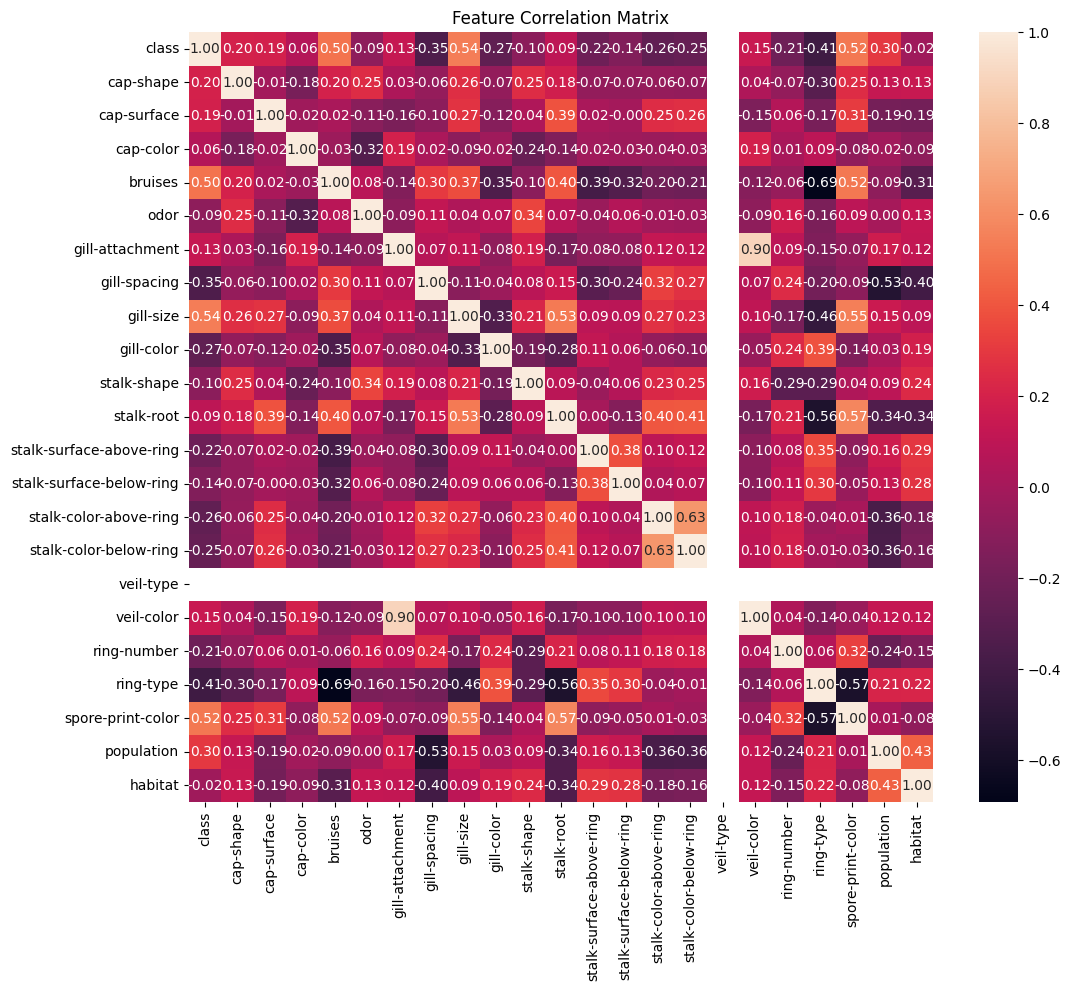

<Figure size 640x480 with 0 Axes>

Correlation matrix visualization chart saved as a Pickle file.


In [95]:
# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Optionally, visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Save the correlation matrix visualization chart as a Pickle file
with open(os.path.join(folder_path, "correlation_matrix_chart.pkl"), "wb") as f:
    pickle.dump(plt.gcf(), f)

plt.show()
print("Correlation matrix visualization chart saved as a Pickle file.")

You can perform grid search for hyperparameter tuning using GridSearchCV in scikit-learn. For a decision tree, some of the parameters you might want to tune could include max_depth, min_samples_split, min_samples_leaf, and criterion.

Here is a basic example of how you might set up a grid search for a Decision Tree Classifier:

In [79]:
# Assuming you have already encoded your categorical features and target variable
# and df_encoded is your DataFrame with encoded features and target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
dt = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

# Setting up the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting the model
grid_search.fit(X_train, y_train)

# Printing the best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluating the model with the best parameters on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 1.0


In [80]:
# Use the PCA-transformed data
X = df_pca  # Assuming df_pca is your DataFrame containing PCA-transformed data
y = df_encoded[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the model
dt = DecisionTreeClassifier(random_state=42)

# Defining the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),  # Adjust 'average' parameter as needed
    'recall': make_scorer(recall_score, average='macro'),  # Adjust 'average' parameter as needed
    'f1_score': make_scorer(f1_score, average='macro')  # Adjust 'average' parameter as needed
}

# Setting up the grid search with refit set to one of the scorers
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=scoring, n_jobs=-1, refit='accuracy')

# Fitting the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                         'min_samples_split': [2, 10, 20, 30, 40, 50]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'precision': make_scorer(precision_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [96]:
# Define the directory path for saving PKL files
save_dir = "G:\\My Drive\\Colab Notebooks\\Mushroom\\Data\\Models\\Tree"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the variables as PKL files
variables_to_save = {
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,
    "dt_model": grid_search.best_estimator_,
    "grid_search_results": grid_search.cv_results_
}

for var_name, var_value in variables_to_save.items():
    with open(os.path.join(save_dir, f"{var_name}.pkl"), "wb") as f:
        pickle.dump(var_value, f)

print("Variables saved as PKL files in the 'Tree' folder.")

Variables saved as PKL files in the 'Tree' folder.


In [97]:
# Printing the best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")
# Save the best parameters as a PKL file
best_params = grid_search.best_params_

with open(os.path.join(save_dir, "best_params.pkl"), "wb") as f:
    pickle.dump(best_params, f)

print("Best parameters saved as a PKL file.")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best parameters saved as a PKL file.


In [82]:
# Score summary for all models tested
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results[['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']])

                                                params  mean_test_accuracy  \
0    {'criterion': 'gini', 'max_depth': None, 'min_...            0.965225   
1    {'criterion': 'gini', 'max_depth': None, 'min_...            0.961686   
2    {'criterion': 'gini', 'max_depth': None, 'min_...            0.959994   
3    {'criterion': 'gini', 'max_depth': None, 'min_...            0.961379   
4    {'criterion': 'gini', 'max_depth': None, 'min_...            0.960917   
..                                                 ...                 ...   
427  {'criterion': 'entropy', 'max_depth': 50, 'min...            0.962918   
428  {'criterion': 'entropy', 'max_depth': 50, 'min...            0.962918   
429  {'criterion': 'entropy', 'max_depth': 50, 'min...            0.962918   
430  {'criterion': 'entropy', 'max_depth': 50, 'min...            0.962918   
431  {'criterion': 'entropy', 'max_depth': 50, 'min...            0.963841   

     mean_test_precision  mean_test_recall  mean_test_f1_score 

In [98]:
# Evaluating the model with the best parameters on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# Save the evaluation result as a PKL file
evaluation_result = {"accuracy": {accuracy_score(y_test, y_pred)}}

with open(os.path.join(save_dir, "best_dt.pkl"), "wb") as f:
    pickle.dump(best_dt, f)

print("Best_dt saved as a PKL file.")

Accuracy: 0.9618461538461538
Evaluation result saved as a PKL file.


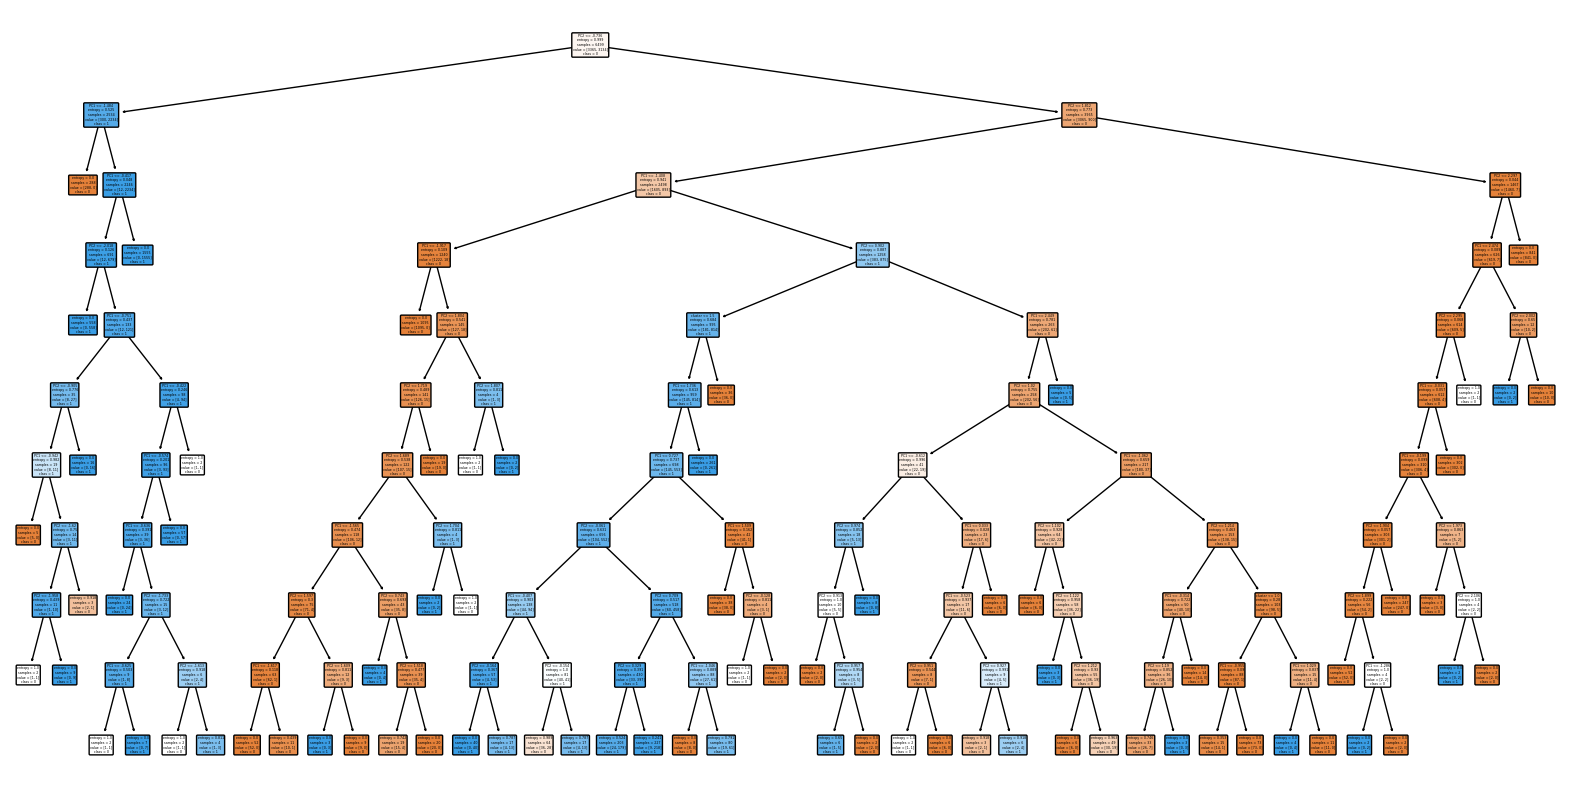

tree_img saved as a PKL.


In [101]:
# Plotting the decision tree

plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X.columns.tolist(), class_names=[str(c) for c in best_dt.classes_], filled=True, rounded=True)
tree_img = plt.show()

# Save the DecisionTreeClassifier model as a PKL file in the specified directory
with open(os.path.join(save_dir, "tree_img.pkl"), "wb") as f:
    pickle.dump(tree_img, f)

print("tree_img saved as a PKL.")
